# MA3J8 Approximation Theory and Applications 

## 02 - Trigonometric Polynomials



In [1]:
using SoftGlobalScope, LinearAlgebra, LaTeXStrings, Plots
gr()

Plots.GRBackend()

### 2.1 Examples of Periodic Functions

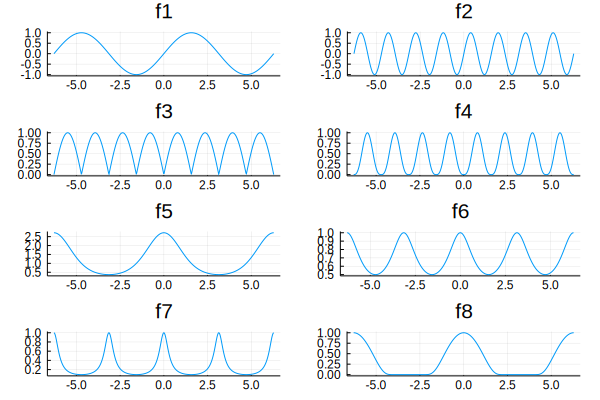

In [2]:
f1(x) = sin(x)
f2(x) = sin(4*x)
f3(x) = abs(sin(2*x))
f4(x) = abs(sin(2*x))^3
f5(x) = exp(cos(x))
f6(x) = 1 / (1 + sin(x)^2)
f7(x) = 1 / (1.0 + 10*sin(x)^2)
g8(x) = x^2 < 2.49999^2 ? exp(3 - 3 / (1-(x/2.5)^2)) : 0.0
f8(x) = g8(mod(x+π,2*π)-π)

allf = [f1, f2, f3, f4, f5, f6, f7, f8]

xx = range(-2*π, stop=2*π, length=500)
Ps = [ plot(xx, f.(xx), label = "", title="f$n") for (n, f) in enumerate(allf) ]
plot(Ps..., layout = (4,2))

### 2.2 L2 Projection

In [3]:
"""
Compute an approximate L2-projection using least-squares 
and evaluate it at the points Z
"""
function L2proj(f, N, Z; nquad=200)
    h = 2*π / nquad  # grid spacing 
    X = range(-π+h, stop=π, length=nquad)  # grid 
    y = f.(X)  # "observations"
    A = [exp(im*k*x) for x in X, k=-N:N]  # LLSQ system matrix 
    f̂ = qr(A) \ y    # solve LSQ system using QR factorisation 
    fN = [ real(sum( f̂[k+N+1] * exp(im*k*z) for k = -N:N ))  
             for z in Z]
    return fN, norm(A * f̂ - y) * sqrt(h)
end
;

The above implementation of an L2-projection is rather crude and brute force. Indeed, we will hardly ever do this in practise, but for the purpose of experimenting with the approximation properties and testing our analysis it will do. 

We can now look at the approximation of some of our functions individually... We will then look at the convergence rates.

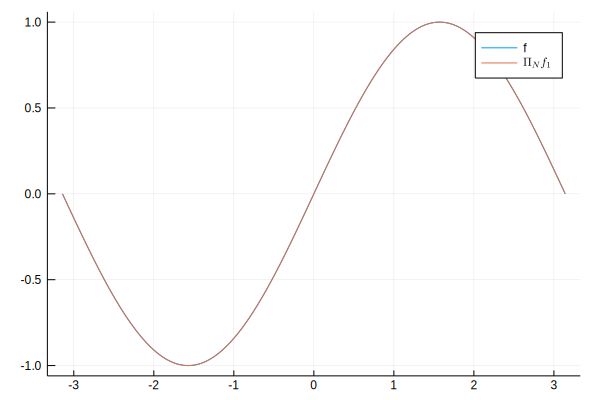

In [4]:
# The approximation for `f1` is of course exact with just N = 1
xx = range(-π, stop=π, length=200)
plot(xx, f1.(xx), label = "f")
plot!(xx, L2proj(f1, 1, xx)[1], label = L"\Pi_N f_1")

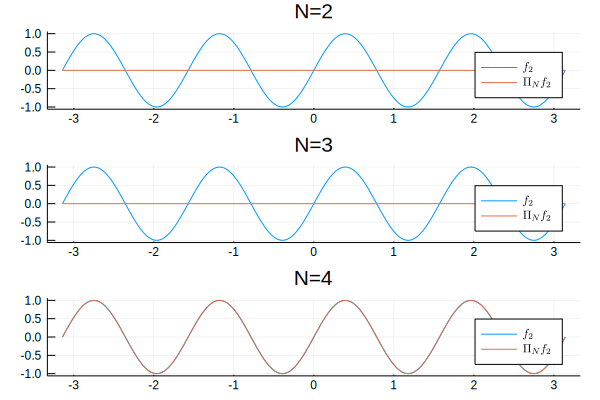

In [5]:
# `f2` is interesting: since it is orthogonal to T_2, its best approximation is just zero 
# on that space, but is exact on T_3.
xx = range(-π, stop=π, length=200)
Ps = [ plot(xx, [f2.(xx), L2proj(f2, N, xx)[1]], 
            label = [L"f_2", L"\Pi_N f_2"], 
            title="N=$N")    for N in [2, 3, 4] ]
plot(Ps..., layout=(3,1))

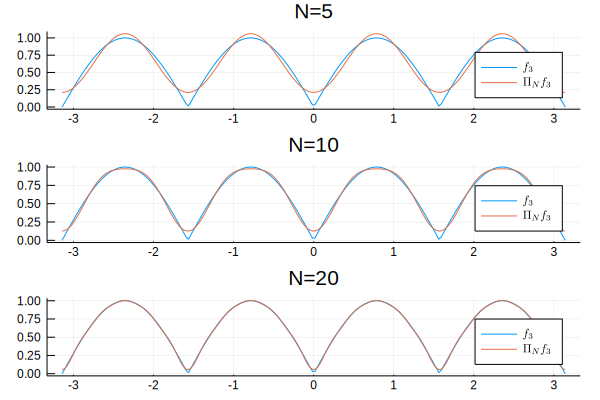

In [6]:
# `f3` is only Lipschitz, so not even C1 - we expect very poor approximation
#      in this case!
xx = range(-π, stop=π, length=200)
Ps = [ plot(xx, [f3.(xx), L2proj(f3, N, xx)[1]], 
            label = [L"f_3", L"\Pi_N f_3"], 
            title="N=$N")   for N in [5, 10, 20] ]
plot(Ps..., layout=(3,1))

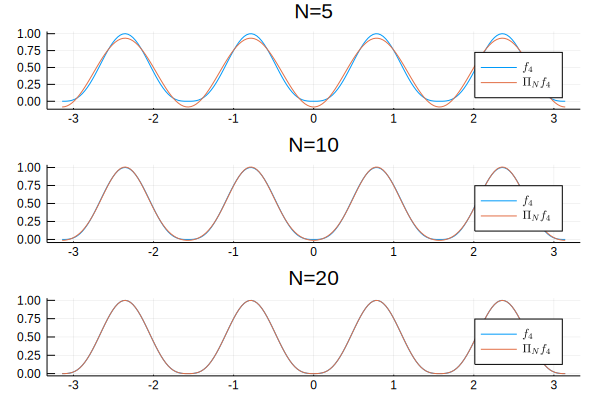

In [7]:
# `f4` looks smooth, but it is not! it will converge 
#      reasonably fast though at least as measured by the 
#.     plain eye
xx = range(-π, stop=π, length=200)
Ps = [ plot(xx, [f4.(xx), L2proj(f4, N, xx)[1]], 
            label = [L"f_4", L"\Pi_N f_4"], 
            title="N=$N")    for N in [5, 10, 20] ]
plot(Ps..., layout=(3,1))

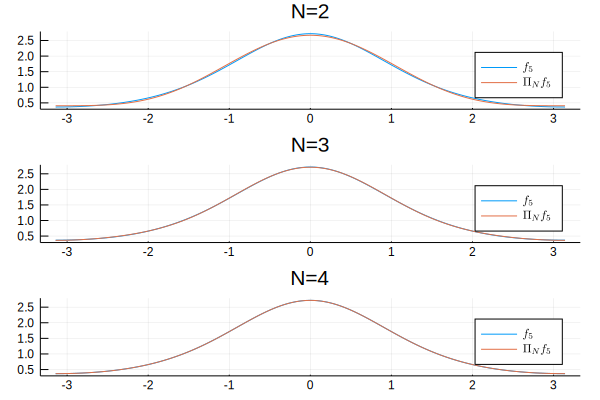

In [8]:
# `f5(x) = exp(cos(x))` is analytic, hence we expect very
# fast convergence
xx = range(-π, stop=π, length=200)
Ps = [ plot(xx, [f5.(xx), L2proj(f5, N, xx)[1]], 
            label = [L"f_5", L"\Pi_N f_5"], 
            title="N=$N")    for N in [2, 3, 4] ]
plot(Ps..., layout=(3,1))

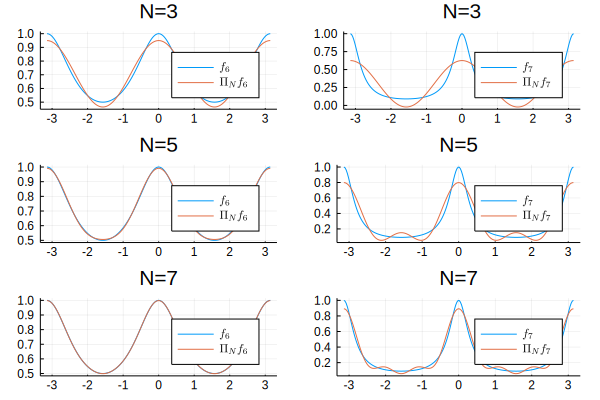

In [9]:
# `f6(x) = 1 / (1 + sin(x)^2)` is again analytic...
# `f7(x) = 1 / (1 + 10*sin(x)^2)` is also analytic...

xx = range(-π, stop=π, length=200)
Ps6 = [ plot(xx, [f6.(xx), L2proj(f6, N, xx)[1]], 
            label = [L"f_6", L"\Pi_N f_6"], 
            title="N=$N") for N in [3, 5, 7] ]
Ps7 = [ plot(xx, [f7.(xx), L2proj(f7, N, xx)[1]], 
            label = [L"f_7", L"\Pi_N f_7"], 
            title="N=$N") for N in [3, 5, 7] ]
plot(Ps6[1], Ps7[1], Ps6[2],Ps7[2],Ps6[3],Ps7[3], layout=(3,2))

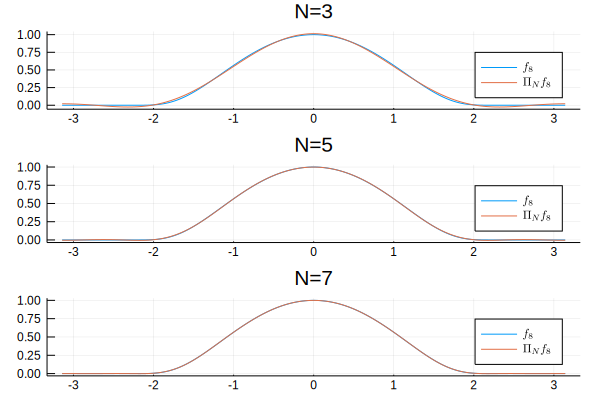

In [10]:
# Finally, f8 is very interesting: C^∞ but not analytic
# visually we simply see very fast convergence; below we 
# will study the convergence rates more carefully.
xx = range(-π, stop=π, length=200)
Ps = [ plot(xx, [f8.(xx), L2proj(f8, N, xx)[1]], 
            label = [L"f_8", L"\Pi_N f_8"], 
            title="N=$N") for N in [3, 5, 7] ]
plot(Ps..., layout=(3,1))

To get a more precise picture we now study the rates of convergence. To that end we split the functions into those that we expect to have an algebraic rate and those where we expect an exponential (or faster!) rate...

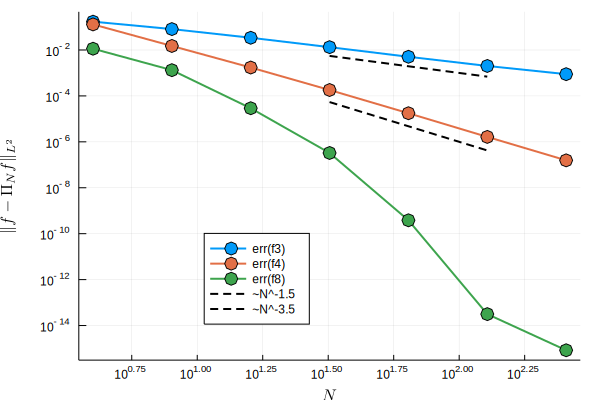

In [11]:
NN = 2 .^(2:8)
nn = [3, 4, 8]
falg = allf[nn]
P = plot(xaxis = (:log,L"N"), yaxis = (:log,L"\| f - \Pi_N f\|_{L^2}"), 
         legend=:bottom)
for (f, n) in zip(falg, nn)
    err = [ L2proj(f, N, xx, nquad=1_000)[2] for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "err(f$n)")
end 
t = [NN[4], NN[6]]
plot!(P, t, t.^(-1.5), lw=2, ls=:dash, c=:black, label="~N^-1.5")
plot!(P, t, 10*t.^(-3.5), lw=2, ls=:dash, c=:black, label="~N^-3.5")
P

We clearly observe algebraic rates for $f_3, f_4$ and and a super-algebraic rate for $f_8$. However the rates we obtain for $f_3, f_8$ are slightly better than we predicted.

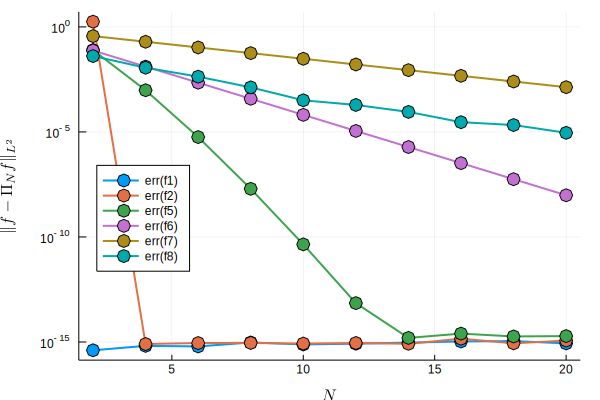

In [12]:
NN = 2:2:20
nn = [1, 2, 5, 6, 7, 8]
fexp = allf[nn]
P = plot(xaxis = (L"N", ), yaxis = (:log, L"\| f - \Pi_N f\|_{L^2}"), 
         legend=:left)
for (f, n) in zip(fexp, nn)
    err = [ L2proj(f, N, xx, nquad=1_000)[2] for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "err(f$n)")
end 
P

Again we clearly observe the predicted behaviour: 
* $f_6, f_7$ display exponential convergence 
* $f_5$ displays super-exponential convergence (we will explain this later!)
* $f_8$ displays sub-exponential convergence (though this is not 100% visible, we can at least immagine it!), which is consistent with the fact that $f_8 \in C^\infty$ but not analytic.

Note also the different rates we obtain for $f_6, f_7$! We explained this in Example 3.17, where we predicted  (up to some details I'm ignoring now)
$$
  \| f - \Pi_N f \|_{L^2} \lesssim e^{-\alpha N},
$$
where $\alpha = \sinh^{-1} 1$ for $f = f_6$ and $\alpha = \sinh^{-1}(1/\sqrt{10})$ for $f = f_7$. We can test this as well:

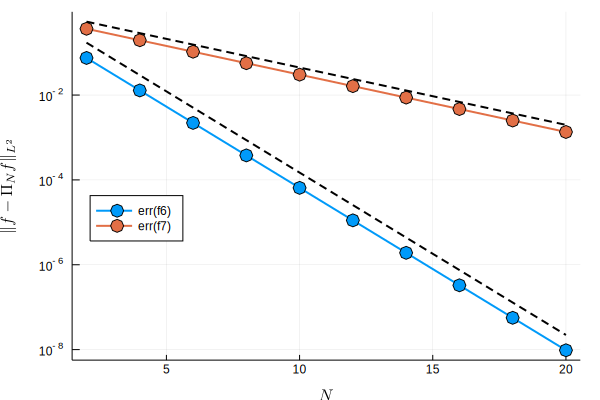

In [13]:

NN = 2:2:20
nn = [6, 7]
fexp = allf[nn]
P = plot(xaxis = (L"N", ), yaxis = (:log, L"\| f - \Pi_N f\|_{L^2}"), 
         legend=:left)
for (f, n) in zip(fexp, nn)
    err = [ L2proj(f, N, xx, nquad=1_000)[2] for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "err(f$n)")
end 
plot!(P, NN, [exp.(-(asinh(1))*NN), exp.(-asinh(1/sqrt(10))*NN)], c=:black, 
        ls = :dash, lw=2, label ="")
P

### 2.3 - Lebesgue Constants

In this section we numerically explore the growth of Lebesgue constants (interpolation operator norm).

In [15]:
using Plots
function L(x, N, j=0)
    xj = [2*π*j/N  for j = 1:N-1]
    if isodd(N)
        return prod( sin.(0.5 * (x+2*π*j/N .- xj)) ./ sin.(0.5*(0.0 .- xj)) )
    else 
        error("need odd N")
    end 
end
function Λ(N)
    Xj = [2*π*j/N  for j = 1:N-1] 
    X = [2*π*j/(10*N)+0.01 for j = 0:20]
    return maximum(sum(abs(L(x, N, j)) for j = 0:N-1) for x in X)
end 

Λ (generic function with 1 method)

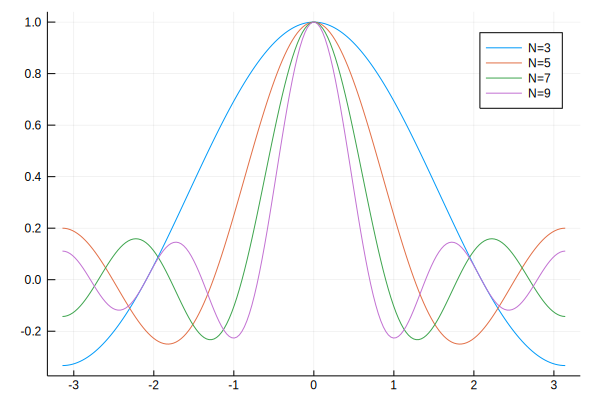

In [16]:
x = range(-π, stop=π, length=200)
P = plot()
for N in [3, 5, 7, 9]
    plot!(P, x, L.(x, N); label = "N=$N")
end 
P

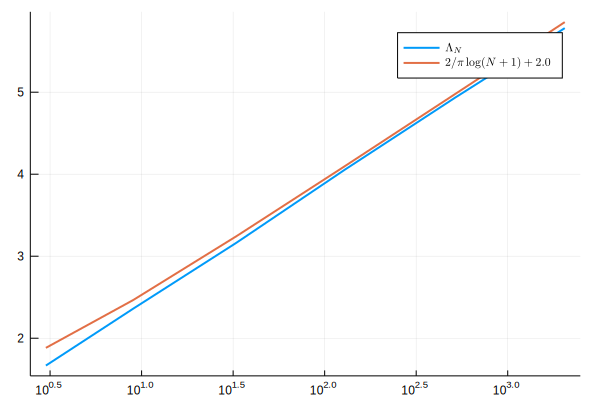

In [17]:
x = range(-π, stop=π, length=1_000);
N = [2^n+1 for n = 1:2:11]
ΛN = Λ.(N)
plot(N, ΛN, lw=2, label=L"\Lambda_N", xaxis = (:log,))
plot!(N, (2/π)*log.(N.+1).+1.0, lw=2, label = L"2/\pi \log(N+1) + 2.0")

### 2.4 Trigonometric Interpolation and Interpolation Error

In [18]:
# The Fastest Fourier Transform in the West
using FFTW
# note in this implementation the number of grid points is 2N!
# further - the x and k grids we choose are as required by the 
# FFT implementation and are just an equivalent representation
# to that used in the lecture notes
"construct a real-space grid"
xgrid(N) = range(0.0, stop=2π-2π/2N, length=2N)
"construct the reciprocal space grid assumed by `fft`"
kgrid(N) = [0:N; -N+1:-1]
"compute the fourier coefficients of I_N"
fouriercoeffs(f::Function, N) = fouriercoeffs(f.(xgrid(N)))
fouriercoeffs(F::Vector) = fft(F) / length(F)
"evaluate a trigonometric polynomial"
eval_trig(F::Function, N, Z) = eval_trig(fouriercoeffs(F, N), Z)
eval_trig(F̂::Vector, Z) = real(
          sum( f̂k * exp.((im * k)*Z)
               for (f̂k, k) in zip(F̂, kgrid(length(F̂)÷2)) ) )


eval_trig (generic function with 2 methods)

A "visual" convergence study will be much the same as for the $L^2$-projection case, hence we skip this entirely, but an interested reader is encourages to work on this of course. Instead, we start with an $L^\infty$-convergence study analogous to the $L^2$-convergence study for the $L^2$-interpolant. We split the study again into algebraically and exponentially convergent schemes.

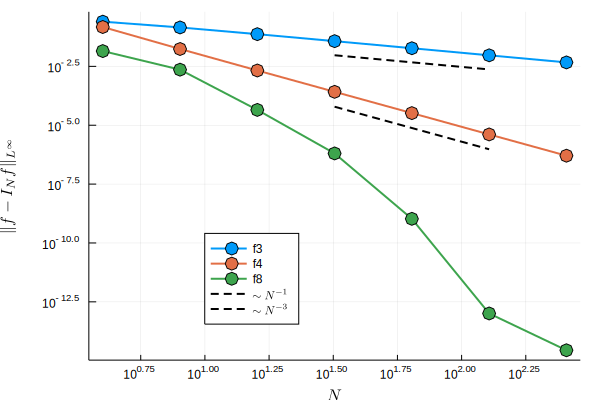

In [19]:
NN = 2 .^(2:8)
nn = [3, 4, 8]
falg = allf[nn]
xerr = range(-π, stop=π, length=1_000)
P = plot(xaxis = (:log,L"N"), 
         yaxis = (:log, L"\| f - I_N f\|_{L^\infty}"), 
         legend=:bottom)
for (f, n) in zip(falg, nn)
    err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf)
            for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "f$n")
end 
t = [NN[4], NN[6]]
plot!(P, t, 0.3*t.^(-1.), lw=2, ls=:dash, c=:black, label=L"\sim N^{-1}")
plot!(P, t, 2*t.^(-3.), lw=2, ls=:dash, c=:black, label=L"\sim N^{-3}")
P

This time we see precisely the rates predicted by the Jackson Theorem.

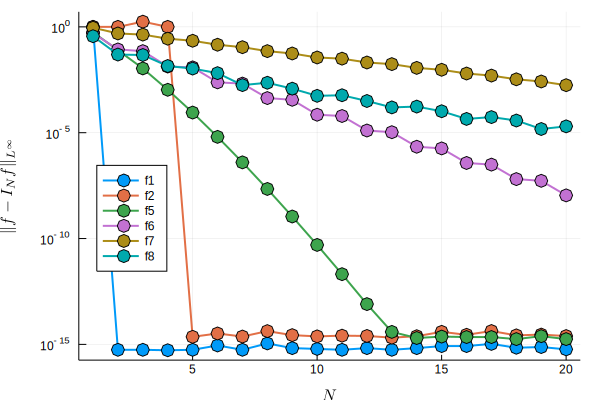

In [20]:
# NN = 2:2:20
NN = 1:20
nn = [1, 2, 5, 6, 7, 8]
fexp = allf[nn]
xerr = range(-π, stop=π, length=1_000)
P = plot( xaxis  = (L"N", ),
          yaxis  = (:log, L"\| f - I_N f\|_{L^\infty}"), 
          legend = :left )
for (f, n) in zip(fexp, nn)
    err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf)
            for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "f$n")
end 
P

All comments made about the $L^2$-projection case apply here as well. 

In addition we can make the following interesting observation: Not all convergence graphs are monotone! This is a clear signature of the fact that the nodal interpolent is *not* a best approximation operator.

 ### 2.4.1 Example 3.16 (Smeared ZigZag) Revisited
 
 We return to Example 3.16 from the lecture notes, to demonstrate that the maximal region of analyticity indeed gives an excellent estimate for the rate of convergence. The match between theory and numerics in this case is simply stunning.

In [21]:
C = [1.0, 2.0, 8.0]
A = asinh.(1.0 ./ C)
G = [ x -> 1/(1+c^2*sin(x)^2) for c in C ]
;

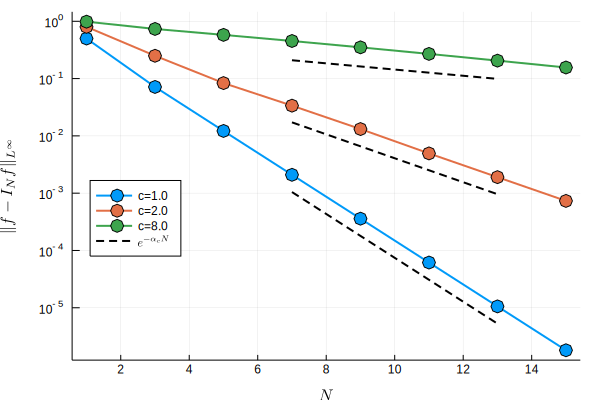

In [22]:
NN = 1:2:16
xerr = range(-π, stop=π, length=1_000)
P = plot( xaxis  = (L"N", ),
          yaxis  = (:log, L"\| f - I_N f\|_{L^\infty}"), 
          legend = :left )
for (f, c) in zip(G, C)
    err = [ norm(f.(xerr) - eval_trig(f, N, xerr), Inf)
            for N in NN ]
    plot!(P, NN, err, lw=2, m=:o, ms=6, label = "c=$c")
end 
t = [NN[4], NN[7]]
plot!(P, t, 0.5*exp.( - A[1] * t), lw=2, ls=:dash, c=:black, label = L"e^{- \alpha_c N}")
for a in A[2:end]
    plot!(P, t, 0.5*exp.( - a * t), lw=2, ls=:dash, c=:black, label = "")    
end 
P

### 2.5 Application: Spectral Methods for BVPs

As an application we show how trigonometric approximation can be employed to solve periodic boundary value problems to very high accuracy.


### 2.5.1 Basic BVP Example

$$\begin{aligned}
  - u'' + u &= f, \qquad \text{in } (-\pi, \pi], \\ 
         u(-\pi) &= u(\pi), \\ 
         u'(-\pi) &= u'(\pi).
\end{aligned}$$

Suppose we represent $f = \sum_k \widehat{f}_k e^{ikx}$ and $u = \sum_k \widehat{u}_k e^{ikx}$, then we can transform the BVP to reciprocal space. Using (formally) 
$$
    u'' = \sum_k \widehat{u}_k (ik)^2 e^{ikx}
        = \sum_k \big[-k^2 \widehat{u}_k\big] e^{ikx}.
$$
Thus, the BVP can be written in terms of $\widehat{f}, \widehat{u}$ as 
$$
    (|k|^2 + 1) {\widehat{u}}_k = \widehat{f}_k.
$$
In particular, we can obtain an approximation by setting 
$$
    \widehat{u}_k = 
    \begin{cases}
        \frac{{\widehat f}_k}{|k|^2+1}, & |k| \leq N, \\ 
        0, & |k| > N
    \end{cases}
$$

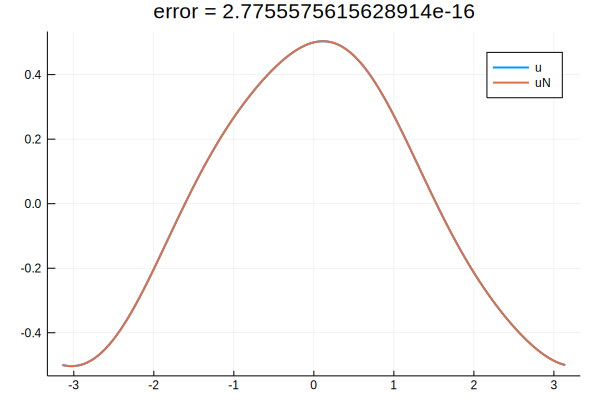

In [23]:
# first an example when the Fourier spectral method is exact 
# ------------------------------------------------------------
# grid(s)
N = 8   
X = xgrid(N)
K = kgrid(N)
# choose a right-hand side 
f(x) = cos(x) + 0.2 * sin(3*x)
# multiplier for derivative operator
D̂ = - im * K
# solve the BVP in Fourier space
û = fouriercoeffs(f, N) ./ (-D̂.^2 .+ 1.0)

# output solution
xp = range(-π, stop=π, length=200)
u = eval_trig(û, xp)
u_ex = cos.(xp) / 2 + 0.2 * sin.(3*xp) / 10
plot(xp, [u_ex, u], lw=2,
     label=["u", "uN"], 
     title = "error = $(norm(u-u_ex, Inf))")

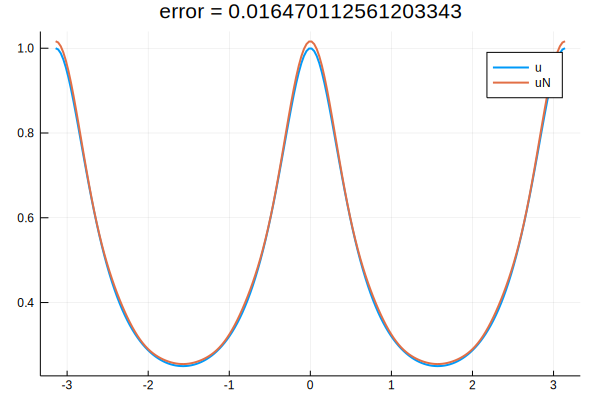

In [24]:
# choose a solution and compute the resultant f 
# ----------------------------------------------
using Calculus
ufun(x) = 1 / (1 + 3*sin(x)^2)
ffun(x) = ufun(x) - second_derivative(ufun, x)

# grid(s)   # play with N
N = 10
K = kgrid(N)
# multiplier for derivative operator
D̂ = - im * K
# solve the BVP in Fourier space
ûN = fouriercoeffs(ffun, N) ./ (-D̂.^2 .+ 1.0)

# output solution
xp = range(-π, stop=π, length=200)
uN = eval_trig(ûN, xp)
usoln = ufun.(xp)
plot(xp, [usoln, uN], lw = 2, 
     label=["u", "uN"], 
     title = "error = $(norm(usoln-uN, Inf))")

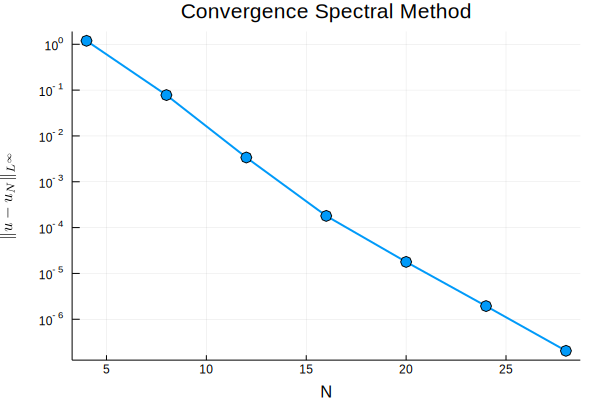

In [25]:
# and to close this off, a simple convergence test...
function bvp_err(N; nquad = 200)
    ûN = fouriercoeffs(ffun, N) ./ (kgrid(N).^2 .+ 1.0)
    xp = range(-π, stop=π, length=nquad) 
    return norm(ufun.(xp) - eval_trig(ûN, xp), Inf)
end 

NN = 4:4:30
errs = bvp_err.(NN)
plot(NN, errs, lw=2, m=:o, ms=5, xaxis = ("N",), 
       yaxis=(:log, L"\|u - u_N\|_{L^\infty}"),
      label="", title = "Convergence Spectral Method")

### 2.5.2 Variable Coefficient Transport Equation

This example is adapted from [L.N. Trefethen, Spectral Methods in Matlab, Program 5]:
$$
u_t + c(x) u_x = 0, \qquad c(x) = \frac15 + \sin^2(x-1)
$$
supplied again with PBCs. Here, $u = u(t, x)$. We first discretize in time using the Leapfrog scheme, 
$$
    \frac{v^{(n+1)} - v^{(n-1)}}{2\Delta t} = - c(x) (v^{(n)})_x
$$
and then in space with a Fourier spectral method, by writing $v \in 
\mathcal{T}_N$.

The interesting aspect of this scheme is that the multiplication operation $f \mapsto c f$ is best performed in real space, while the differentiation operation $f \mapsto f_x$ is best performed in reciprocal space. This gives the following algorithm.

In [27]:
function plot_soln(t, X, v, c)
    P = plot( xaxis = ([0, 2*π], ), yaxis = ([0.0, 1.5],) )
    plot!(X, c, lw=1, c=:black, label = "c")
    plot!(X, v, lw=3, label = "v")
    return P
end

plot_soln (generic function with 1 method)

In [28]:
# grid 
N = 256 
X = xgrid(N)
K = kgrid(N)
t = 0.0
dt = π/(4N)
tmax = 16.0

# transport coefficient
C = 0.2 .+ sin.(X .- 1).^2
# initial condition, we also need one addition v in the past
V = exp.(-100*(X.-1).^2)
Vold = exp.(-100*(X .- 1 .- 0.2*dt).^2)
# differentiation operator 
D̂ = im*K

# time-stepping loop
anim = Animation()
for _ = 1:ceil(tmax/dt)/20
    for __=1:20
        t += dt 
        # differentiation in reciprocal space
        W = real.( ifft( D̂ .* fft(V) ) )   
        # multiplication and update in real space
        Vnew = Vold - 2 * dt * C .* W 
        Vold = V
        V = Vnew 
    end
    frame(anim, plot_soln(t, X, V, C))
end
gif(anim, fps=15)

┌ Info: Saved animation to 
│   fn = /Users/ortner/gits/MA3J8ApxThyApp/jl/tmp.gif
└ @ Plots /Users/ortner/.julia/packages/Plots/cxnAH/src/animation.jl:90


Plots.AnimatedGif("/Users/ortner/gits/MA3J8ApxThyApp/jl/tmp.gif")

### 2.5.4 Filtering a Signal

Suppose that we have a (periodic) signal $f(x)$ which we obtain with noise $g(x) = f(x) + \eta(x)$. Can we recover the original signal? The idea is that we *assume* that $f(x)$ is smooth, that is, it has rapid decay of fourier coefficients, while the noise $\eta(x)$ is rough, i.e. its Fourier coefficients do not decay. 

Let us use a simple example to demonstrate this: 
$$
  f(x) = \sin(2x) + \cos(4x)
$$

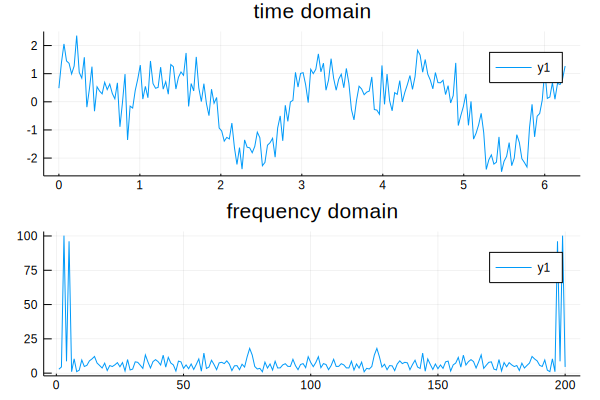

In [30]:

f(x) = sin(2*x) + cos(4*x) # the original signal 
C = 0.5                    # the magnitude of the noise 
N = 100                    # number of samples
# we generate noisy samples
X = xgrid(N)
F = f.(X) + C * randn(length(X))
# Look at the fourier coefficients 
F̂ = fft(F)
plot( plot(X, F, title = "time domain"), 
      plot(1:2*N, abs.(F̂), title = "frequency domain"), 
      layout = (2,1) )

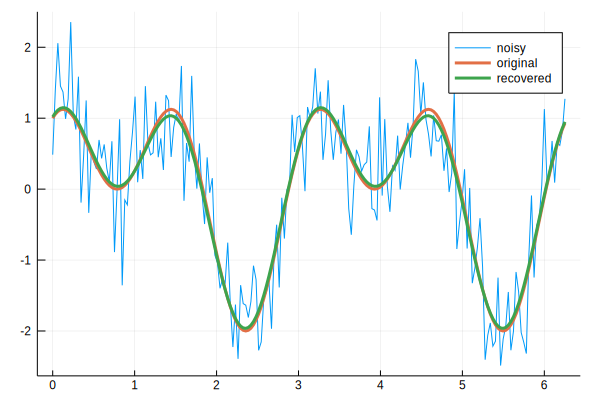

In [31]:
# we can "filter" the signal by simply removing the small fourier components. 
Ĝ = copy(F̂)
small = findall(abs.(Ĝ) .< 20)
Ĝ[small] .= 0.0
G = real.(ifft(Ĝ))
plot(X, F, lw=1, label = "noisy")
plot!(X, [f.(X), G], lw = 3, label = ["original", "recovered"])